<a href="https://colab.research.google.com/github/hemapallevada/BLOCKINOPENZEPPLIN/blob/master/DesicionTreeLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
url='https://raw.githubusercontent.com/ArunkumarGoge/DataAnalyticsLab/master/Exercise%203/Exercise_dataset.csv'
dt=pd.read_csv(url)
print(dt.head(10))

  Weather Temperature Humidity   Wind Golf Play
0    fine         hot     high   none        no
1    fine         hot     high    few        no
2   cloud         hot     high   none       yes
3    rain        warm     high   none       yes
4    rain        cold   medium  none        yes
5    rain        cold   medium    few        no
6   cloud        cold   medium    few       yes
7    fine        warm     high   none       no 
8    fine        cold   medium   none       yes
9    rain        warm   medium   none       yes


In [14]:
from sklearn.preprocessing import LabelEncoder
dt2=[]
le = LabelEncoder()
for i in range(0,5):
  X1=dt.iloc[:,i].values
  
  X1=le.fit_transform(X1)
  dt2.append(list(X1))
print(dt2)


[[1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2], [1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2], [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0], [1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0], [0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1]]


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [19]:
X_temp=[dt2[:][:-1]]
X=[]
for i in range(0,len(dt2[0])):
  X.append([])
  for j in range(0,len(dt2)):
    X[-1].append(dt2[j][i])
Y=dt2[:][-1]
dt2=dt2[:][:-2]
print(X)

[[1, 1, 0, 1], [1, 1, 0, 0], [0, 1, 0, 1], [2, 2, 0, 1], [2, 0, 1, 2], [2, 0, 1, 0], [0, 0, 1, 0], [1, 2, 0, 1], [1, 0, 1, 1], [2, 2, 1, 1], [1, 2, 1, 0], [0, 2, 0, 0], [0, 1, 1, 1], [2, 2, 0, 0]]


In [20]:
print(Y)

[1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0]


In [22]:
X_train,X_test,y_train, y_test=train_test_split(X,Y,random_state=2, test_size=0.4)

In [23]:
clf=DecisionTreeClassifier(criterion='entropy')

In [24]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
y_pred=clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
print('Accuracy score on train data',accuracy_score
      (y_true=y_train,y_pred=clf.predict(X_train)))
print('Accuracy score on test data',accuracy_score
      (y_true=y_test,y_pred=y_pred))

Accuracy score on train data 1.0
Accuracy score on test data 0.8333333333333334


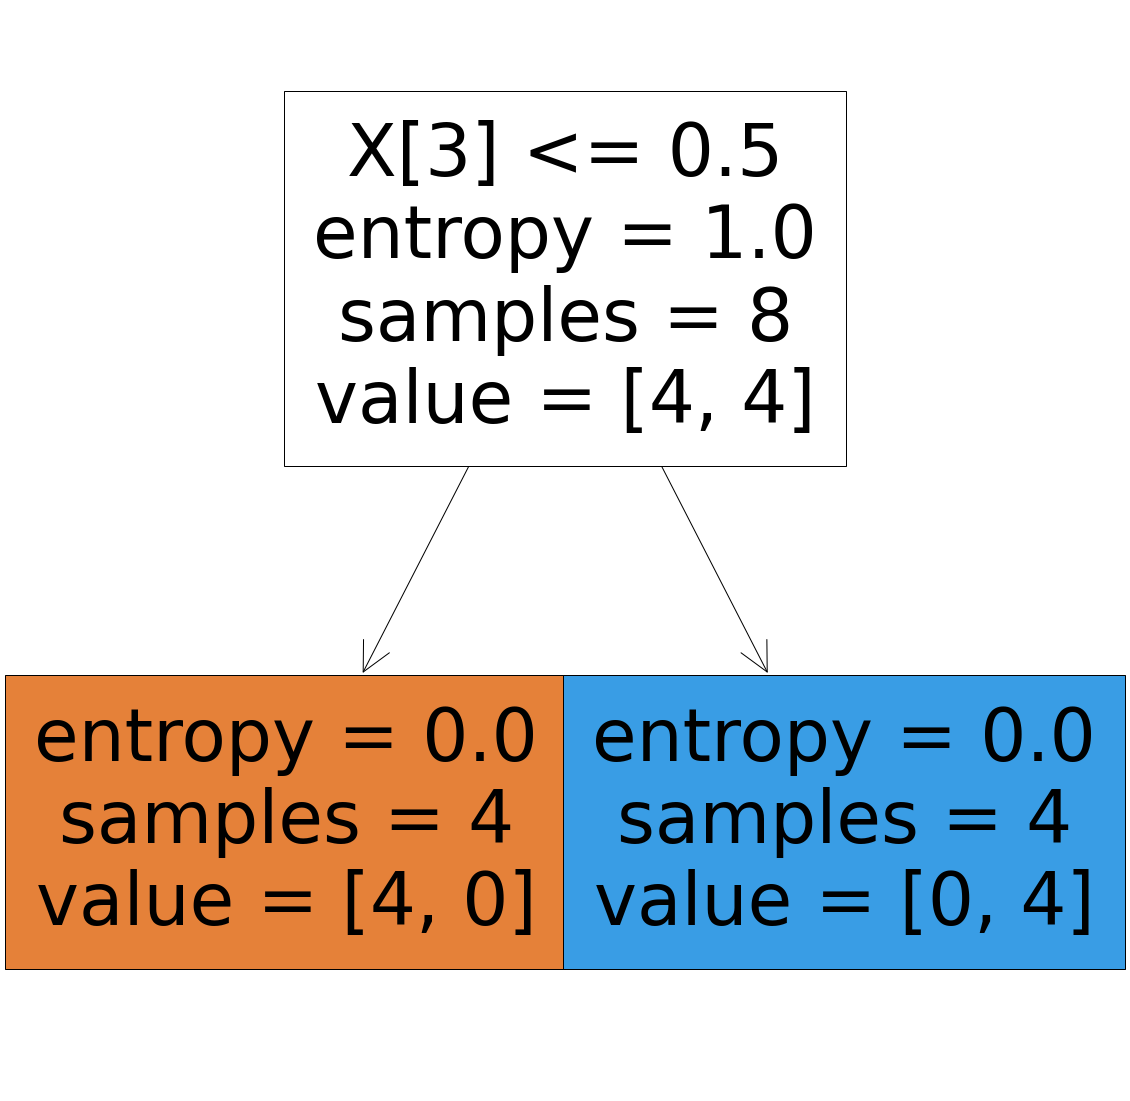

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize = (20,20))
plot_tree(clf,filled=True)
plt.show()